In [41]:
import os
import shutil
sorted(os.listdir())

['.DS_Store',
 '.ipynb_checkpoints',
 'MaskClassification.ipynb',
 'Not_Worn',
 'README.txt',
 'WWMR-DB - Labels',
 'WWMR-DB - Part 1',
 'WWMR-DB - Part 2',
 'Worn_Correctly']

In [49]:
#Create New Folders if they dont exist
if not os.path.isdir('Worn_Correctly'):
    os.makedirs("Worn_Correctly")
    
if not os.path.isdir('Not_Worn'):
    os.makedirs("Not_Worn")

In [57]:
#Make functions for copying images into a single folder
def copyImages(start, destination, category):
    for folder in os.listdir(start):
        subdir = os.path.join(start, folder)
        if os.path.isdir(subdir):

            subdir2 = os.path.join(subdir, category)
            if os.path.isdir(subdir2):

                for folder2 in os.listdir(subdir2):
                    subdir3 = os.path.join(subdir2, folder2)
                    if os.path.isdir(subdir3):
                        for file in os.listdir(subdir3):
                            image = os.path.join(subdir3, file)
                            shutil.copy2(image, destination)
                            
                            
def copyImages2(start, destination, category):
    for folder in os.listdir(start):
        subdir = os.path.join(start, folder)
        if os.path.isdir(subdir):

            subdir2 = os.path.join(subdir, category)
            if os.path.isdir(subdir2):

                for file in os.listdir(subdir2):
                    image = os.path.join(subdir2, file)
                    shutil.copy2(image, destination)

### Copy Images to Binary Classification Folders

In [51]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Correctly"
category = "Mask Or Respirator Correctly Worn"
copyImages(start, destination, category)
len(os.listdir(destination))

70

In [52]:
start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Correctly"
category = "Mask Or Respirator Correctly Worn"
copyImages(start, destination, category)
len(os.listdir(destination))

152

In [58]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Not_Worn"
category = "Mask Or Respirator Not Worn"
copyImages2(start, destination, category)
len(os.listdir(destination))

46

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Not_Worn"
category = "Mask Or Respirator Not Worn"
copyImages2(start, destination, category)
len(os.listdir(destination))

### Read Images to create list 

In [85]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
folder = os.getcwd() + "/Worn_Correctly"
wc_list = [cv2.imread(os.path.join(folder, image)) for image in os.listdir(folder)]

In [82]:
folder = os.getcwd() + "/Not_Worn"
nw_list = [cv2.imread(os.path.join(folder, image)) for image in os.listdir(folder)]

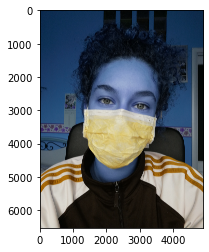

In [109]:
plt.imshow(wc_list[0])
plt.show()

### How many unique image dimensions are there?

In [91]:
df = pd.DataFrame([[image.shape[0],image.shape[1]] for image in wc_list])
df = pd.concat([df, pd.DataFrame([[image.shape[0],image.shape[1]] for image in nw_list])])
df.columns = ["R", "C"]
df

,R,C
0,6528,4896
1,5184,3880
2,3264,2448
3,5184,3880
4,5184,3880
...,...,...
108,6528,4896
109,3264,2448
110,4032,1860
111,3264,2448


In [105]:
df1 = df.groupby(['R','C']).size().reset_index().rename(columns={0:'count'})
df1.sort_values(by = ["count"], ascending=False).reset_index(drop = True)

,R,C,count
0,3264,2448,50
1,5184,3880,30
2,4608,3456,26
3,4624,3472,20
4,1280,720,19
5,3456,5184,18
6,6528,4896,12
7,3088,2320,10
8,1920,1080,9
9,4032,1860,9
